In [2]:
import pandas as pd
import os
import warnings

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")

train = pd.read_csv('C:/Users/tb990/Documents/studydata/store_credit_card_revenue_data/funda_train.csv')
submission = pd.read_csv('C:/Users/tb990/Documents/studydata/store_credit_card_revenue_data/submission.csv')

## 1. 데이터 기본 정보 확인하기

In [5]:
train.shape 

(6556613, 9)

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [6]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


# 2. 변수 분리하기

In [12]:
store_id = train['store_id'] ## 상점 고유 아이디
card_id = train['card_id'] ## 사용한 카드의 고유 아이디
card_company = train['card_company'] ## 비식별화된 카드 회사
transacted_date = train['transacted_date'] ## 거래 날짜
transacted_time = train['transacted_time'] ## 거래시간(시:분)
installment_term = train['installment_term'] ## 할부 개월 수(60개월+실제 할부 개월)
region = train['region'] ## 상점의 지역
type_of_business = train['type_of_business'] ## 상점의 업종
amount = train['amount'] ## 매출액

# 3. 이것저것 톺아보기

## (1) 누락값 확인

In [154]:
train.apply(lambda x: pd.isna(x).sum())

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

## (2) 이상치 확인

In [68]:
train[train['amount']<0]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
41,0,40,a,2016-06-10,17:26,2,NaN,기타 미용업,-8571.428571
347,0,285,a,2016-08-04,17:52,0,NaN,기타 미용업,-1857.142857
731,0,473,g,2016-10-17,10:32,0,NaN,기타 미용업,-2000.000000
831,0,230,b,2016-11-03,15:36,0,NaN,기타 미용업,-85.714286
944,0,138,a,2016-11-28,13:21,0,NaN,기타 미용업,-57.142857
...,...,...,...,...,...,...,...,...,...
6556242,2136,4663626,b,2019-02-01,21:19,0,제주 제주시,기타 주점업,-13428.571429
6556448,2136,4663760,d,2019-02-15,00:46,0,제주 제주시,기타 주점업,-6928.571429
6556485,2136,4663779,b,2019-02-18,02:45,0,제주 제주시,기타 주점업,-5571.428571
6556489,2136,4663780,d,2019-02-18,21:43,0,제주 제주시,기타 주점업,-8571.428571


* amount열에 73100개의 이상치가 있군!

In [155]:
train.describe()

,store_id,card_id,installment_term,amount
count,6.556613e+06,6.556613e+06,6.556613e+06,6.556613e+06
mean,1.084930e+03,2.268127e+06,1.382017e-01,1.043511e+04
std,6.152183e+02,1.351058e+06,1.188152e+00,3.104031e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,-2.771429e+06
25%,5.860000e+02,1.088828e+06,0.000000e+00,2.142857e+03
50%,1.074000e+03,2.239304e+06,0.000000e+00,4.285714e+03
75%,1.615000e+03,3.438488e+06,0.000000e+00,8.571429e+03
max,2.136000e+03,4.663856e+06,9.300000e+01,5.571429e+06


# 4. 변수 별로 각각 살펴보기 

store_id
card_id	card_company
transacted_date
transacted_time
installment_term
region
type_of_business
amount

### (1) 상점 고유 아이디(store_id)

In [89]:
store_id.unique() 

array([   0,    1,    2, ..., 2134, 2135, 2136], dtype=int64)

In [127]:
store_id.nunique() 

1967

In [128]:
train['store_id'].value_counts()

1330    9518
1196    9471
1171    9391
710     9347
826     9328
        ... 
1974     429
1240     426
795      231
2119     112
1063      72
Name: store_id, Length: 1967, dtype: int64

In [204]:
train[train['store_id']==1330]
# train[train['store_id']==1196]
# train[train['store_id']==1171]
# train[train['store_id']==710]
# train[train['store_id']==826]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,datetime,year_month
4050735,1330,2871020,b,2016-06-01,01:47,0,NaN,한식 음식점업,6857.142857,2016-06-01 01:47:00,2016-06
4050736,1330,2871021,e,2016-06-01,19:23,0,NaN,한식 음식점업,6714.285714,2016-06-01 19:23:00,2016-06
4050737,1330,2871022,c,2016-06-01,20:03,0,NaN,한식 음식점업,14285.714286,2016-06-01 20:03:00,2016-06
4050738,1330,2871023,c,2016-06-01,20:59,0,NaN,한식 음식점업,7142.857143,2016-06-01 20:59:00,2016-06
4050739,1330,2871024,c,2016-06-01,21:00,0,NaN,한식 음식점업,8285.714286,2016-06-01 21:00:00,2016-06
...,...,...,...,...,...,...,...,...,...,...,...
4060248,1330,2879117,b,2019-02-26,13:22,0,NaN,한식 음식점업,1714.285714,2019-02-26 13:22:00,2019-02
4060249,1330,2879118,e,2019-02-27,18:54,0,NaN,한식 음식점업,11285.714286,2019-02-27 18:54:00,2019-02
4060250,1330,2879115,d,2019-02-27,21:54,0,NaN,한식 음식점업,1714.285714,2019-02-27 21:54:00,2019-02
4060251,1330,2879119,a,2019-02-28,16:46,0,NaN,한식 음식점업,928.571429,2019-02-28 16:46:00,2019-02


* 거래량 TOP 4 상점의 업종은 주로 음식, 음료상점 

### (2) 사용한 카드의 고유 아이디(card_id)

In [126]:
card_id.nunique() 

3950001

In [129]:
train['card_id'].value_counts()

3820295    2443
3820350    1214
1877306     645
2838881     563
3820294     512
           ... 
2049510       1
2045416       1
2041322       1
2033134       1
4196351       1
Name: card_id, Length: 3950001, dtype: int64

In [133]:
train[train['card_id']==3820295]
# train[train['card_id']==3820350]
# train[train['card_id']==1877306]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
5362773,1770,3820350,e,2017-12-12,10:16,0,NaN,NaN,142.857143
5362774,1770,3820350,e,2017-12-12,10:17,0,NaN,NaN,-142.857143
5362775,1770,3820350,e,2017-12-12,10:17,0,NaN,NaN,157.142857
5362776,1770,3820350,e,2017-12-12,10:17,0,NaN,NaN,-157.142857
5362777,1770,3820350,e,2017-12-12,10:17,0,NaN,NaN,171.428571
...,...,...,...,...,...,...,...,...,...
5365068,1770,3820350,e,2018-01-11,12:22,0,NaN,NaN,-728.571429
5366001,1770,3820350,e,2018-03-12,13:59,0,NaN,NaN,142.857143
5366002,1770,3820350,e,2018-03-12,14:00,0,NaN,NaN,-142.857143
5366003,1770,3820350,e,2018-03-12,14:00,0,NaN,NaN,142.857143


해결! train[(train['card_id']==3820295) & (train['amount']<0)]

### (3) 비식별화된 카드 회사(card_company)

In [156]:
card_company.unique() 

array(['b', 'h', 'c', 'a', 'f', 'e', 'g', 'd'], dtype=object)

In [142]:
card_company.nunique() 

8

In [151]:
plt.rcParams['font.family'] = 'Malgun Gothic'

<IPython.core.display.Javascript object>


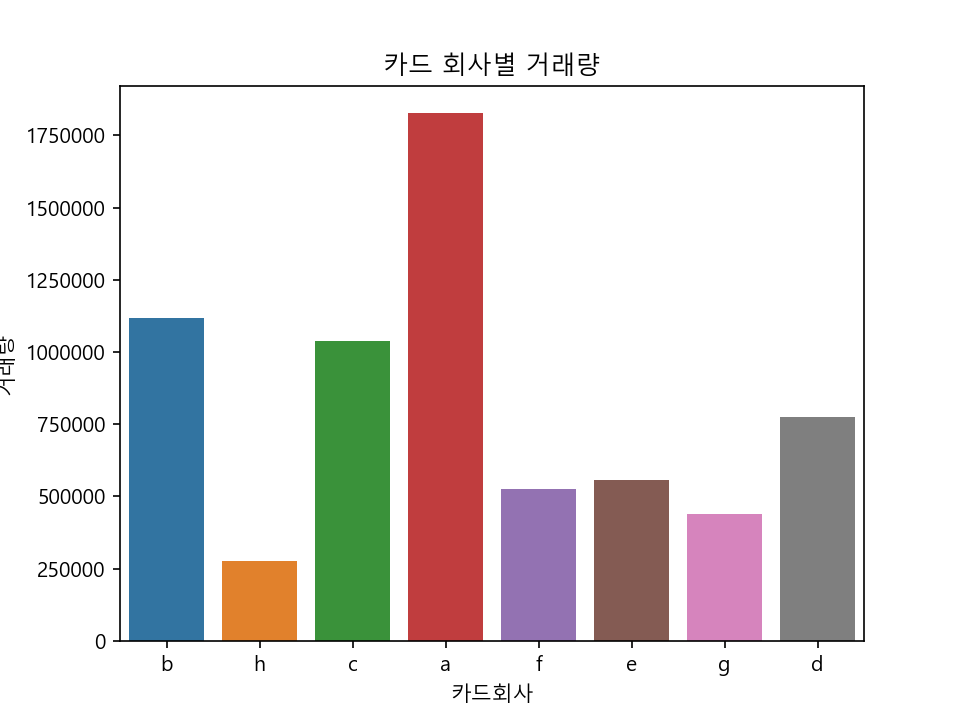

Text(0, 0.5, '거래량')

In [152]:
ax = plt.subplots()
ax = sns.countplot('card_company',data=train)
ax.set_title('카드 회사별 거래량')
ax.set_xlabel('카드회사')
ax.set_ylabel('거래량')

### (4) 거래 날짜(transacted_date)

In [153]:
transacted_date.unique() 

array(['2016-06-01', '2016-06-02', '2016-06-03', ..., '2019-01-01',
       '2019-02-05', '2017-10-04'], dtype=object)

* 2016/06/01 ~ 2017/10/04

### (5) 거래 시간(transacted_time)

In [37]:
# 거래시간(시:분)
nun_time = transacted_time.nunique()
min_time = transacted_time.min()
max_time = transacted_time.max()
print(nun_time, min_time, max_time)

1440 00:00 23:59


* 모든 시각에 거래가 이뤄짐 (1440분)

In [160]:
# 거래날짜, 거래시간 열 합치기
train['datetime'] = pd.to_datetime(train.transacted_date + " " + train.transacted_time, format='%Y-%m-%d %H:%M:%S')
# '연도-월' 시간데이터열 생성
train['year_month'] = train['transacted_date'].str.slice(stop=7)

In [172]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,datetime,year_month
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016-06-01 13:13:00,2016-06
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,2016-06-01 18:12:00,2016-06
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,2016-06-01 18:52:00,2016-06
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857,2016-06-01 20:22:00,2016-06
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,2016-06-02 11:06:00,2016-06


<IPython.core.display.Javascript object>


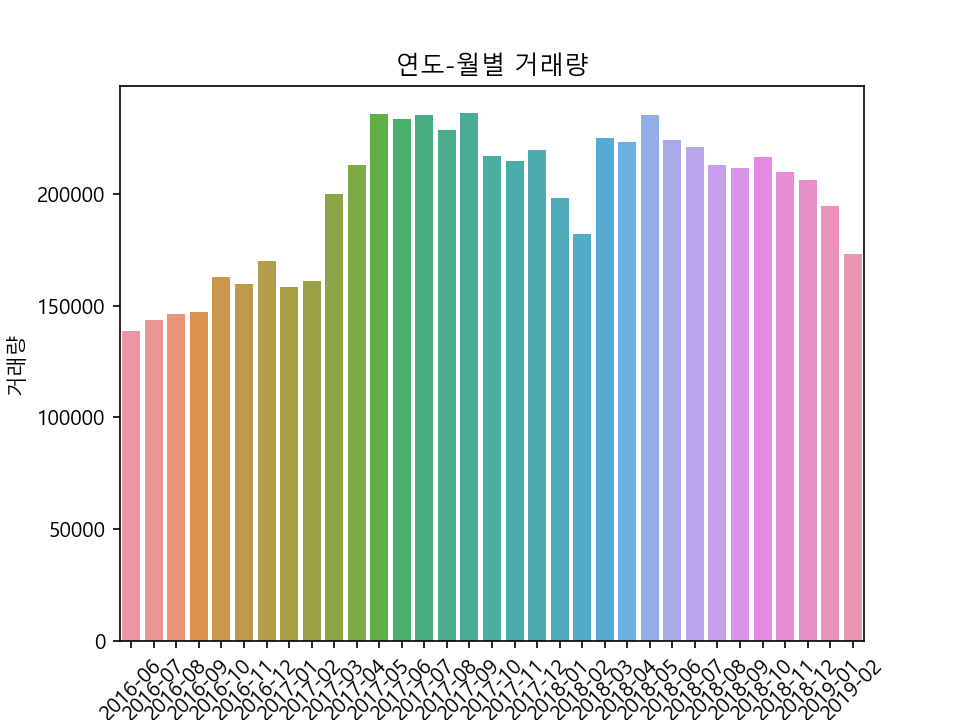

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

In [178]:
ax2 = plt.subplots()
ax2 = sns.countplot('year_month',data=train)
ax2.set_title('연도-월별 거래량')
ax2.set_xlabel('연도-월')
ax2.set_ylabel('거래량')
plt.xticks(rotation=45)

In [ ]:
# ax3 = plt.subplots()
ax3 = sns.countplot('transacted_time',data=train)
ax3.set_title('시간별 거래량')
ax3.set_xlabel('시간별')
ax3.set_ylabel('거래량')
plt.xticks(rotation=45)

### (6) 할부 개월 수{포인트 사용시 60개월+실제 할부 개월}(installment_term)

In [182]:
train['installment_term'].unique() 

array([ 0,  2,  3, 60,  4,  5,  6, 10, 12, 15,  7,  8,  9, 18, 24, 16, 14,
       11, 20, 36, 13, 35, 80, 17, 19, 23, 30, 22, 83, 63, 93, 65, 82, 72],
      dtype=int64)

In [184]:
train['installment_term'].value_counts()

0     6327632
3      134709
2       42101
5       23751
6       10792
10       6241
4        4816
12       2699
60       1290
7         553
8         413
24        404
9         349
18        332
15        130
20        116
80         83
11         47
30         43
36         36
16         23
14         12
63          8
83          6
65          6
72          4
19          4
13          3
82          2
35          2
23          2
93          2
22          1
17          1
Name: installment_term, dtype: int64

In [88]:
x_0 = train[train['installment_term']>0]

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
39,0,39,g,2016-06-10,14:48,2,NaN,기타 미용업,9000.000000
40,0,40,a,2016-06-10,17:25,2,NaN,기타 미용업,8571.428571
41,0,40,a,2016-06-10,17:26,2,NaN,기타 미용업,-8571.428571
42,0,40,a,2016-06-10,17:26,2,NaN,기타 미용업,8571.428571
90,0,88,b,2016-06-19,18:06,2,NaN,기타 미용업,8571.428571
...,...,...,...,...,...,...,...,...,...
6551762,2136,4661022,e,2018-01-15,22:13,2,제주 제주시,기타 주점업,8000.000000
6552033,2136,4661176,c,2018-02-09,01:08,2,제주 제주시,기타 주점업,8142.857143
6553547,2136,4662057,g,2018-06-06,00:15,3,제주 제주시,기타 주점업,13285.714286
6553824,2136,4662214,a,2018-06-28,01:07,3,제주 제주시,기타 주점업,14000.000000


* 할부 유무로 나누기

### (7) 상점의 지역(region)

In [190]:
region.nunique() 

180

In [197]:
train['region'].value_counts().head(10)

경기 수원시    122029
충북 청주시    116766
경남 창원시    107147
경남 김해시    100673
경기 평택시     82138
서울 마포구     78652
제주 제주시     68130
경북 포항시     67490
서울 강남구     65312
경북 구미시     65235
Name: region, dtype: int64

* 유동인구 데이터

### (8) 상점의 업종(type_of_business)

In [191]:
type_of_business.nunique()

145

In [198]:
train['type_of_business'].value_counts().head(10)

한식 음식점업                    745905
두발 미용업                     178475
의복 소매업                     158234
기타 주점업                     102413
치킨 전문점                      89277
일식 음식점업                     77649
서양식 음식점업                    74577
간이음식 포장 판매 전문점              74130
비알코올 음료점업                   72720
피자, 햄버거, 샌드위치 및 유사 음식점업     49586
Name: type_of_business, dtype: int64

* 계절성

### (9) 매출액(amount)

<IPython.core.display.Javascript object>


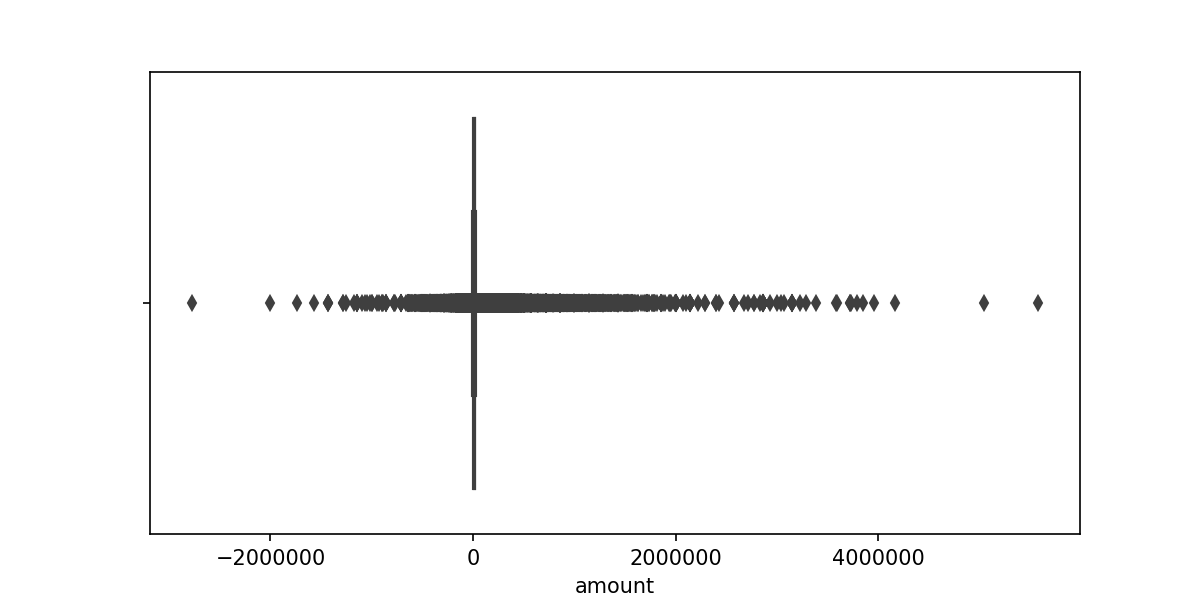

In [3]:
plt.figure(figsize=(8, 4))
sns.boxplot(train['amount'])

# 5. 변수 관계 살펴보기

In [200]:
train.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount,datetime,year_month
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857,2016-06-01 13:13:00,2016-06
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857,2016-06-01 18:12:00,2016-06
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000,2016-06-01 18:52:00,2016-06
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857,2016-06-01 20:22:00,2016-06
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000,2016-06-02 11:06:00,2016-06


<IPython.core.display.Javascript object>


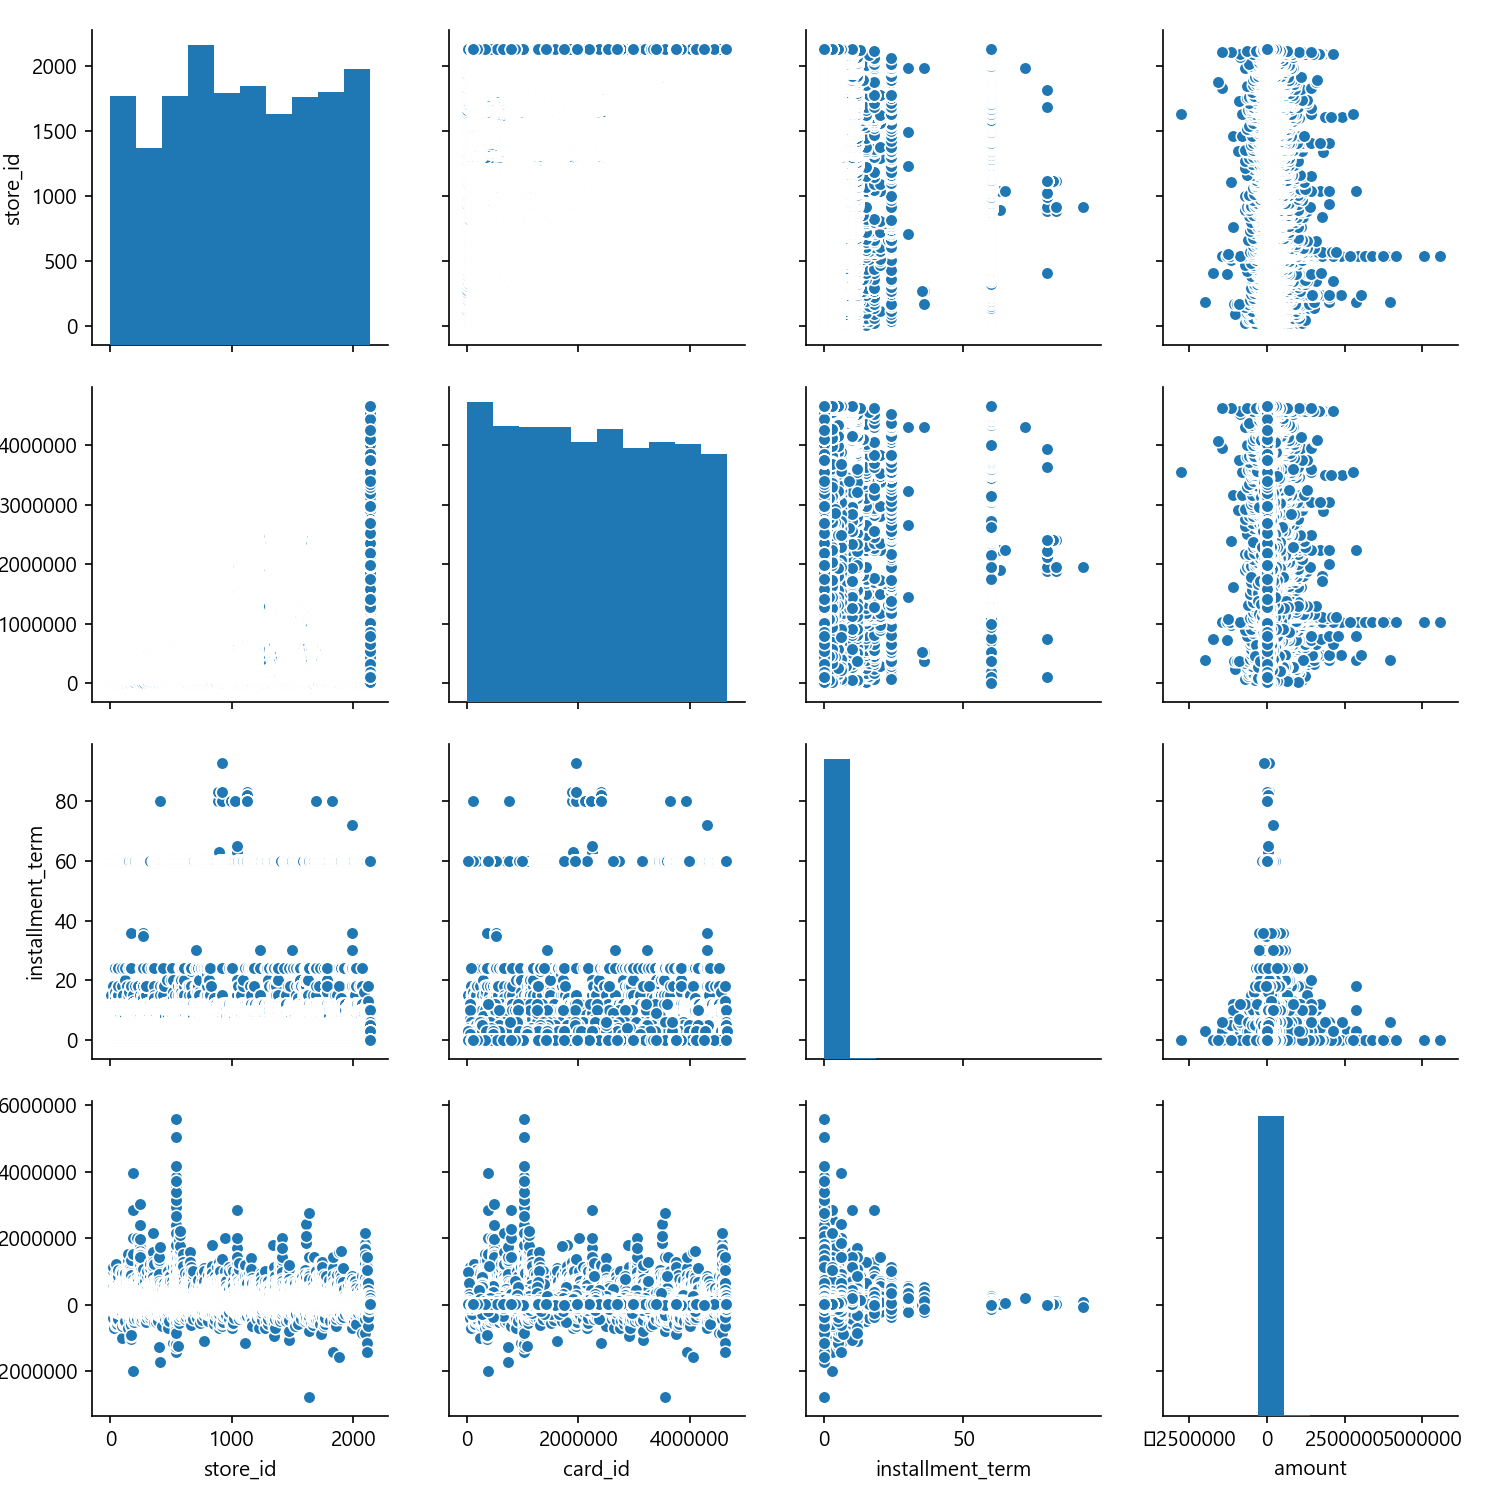

In [201]:
fig = sns.pairplot(train)

In [203]:
ax5 = plt.subplots()
ax5 = sns.boxplot(x='year_month', y='amount', data=train)
ax5.set_title('')
ax5.set_xlabel('월별')
ax5.set_ylabel('거래량')

<IPython.core.display.Javascript object>

Text(0, 0.5, '거래량')